In [1]:
# Импортируем датасет
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

# Матрица неточности
from sklearn.metrics import confusion_matrix

# Оценка точности
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Загружаем данные по цветкам iris из билиотеки sklearn
iris = load_iris()
# Создаем DataFrame с интересующими нас признаками
data = pd.DataFrame(iris.data, columns=iris.feature_names)[['sepal length (cm)', 'sepal width (cm)']]
data_class = iris.target
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [26]:
# Разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.2, random_state = 42)

# Смотри сколько у нас значений в тренировоцном цикле и в тестовом

print(f'Тренировочных значений: {y_train.shape[0]} ')
print(f'Тестовых значений: {y_test.shape[0]} ')

# Импортируем LDA-функционал и записывае в переменную lda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

# обучаем данные для дискриминантного анализа
lda.fit(X_train, y_train)

# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)

# Можно посмотреть разницу факта и прогноза, но мы сделаем расчет для определения точности нашего прогнозирования

# result = pd.DataFrame([y_test, lda.predict(X_test)]).T

# Оценка точности
print(f'Оценка точности: {round(accuracy_score(y_test, lda.predict(X_test)), 2)}')

# Матрица неточности
print('Матрица неточности:') 
print(confusion_matrix(y_test, y_pred)) 

Тренировочных значений: 120 
Тестовых значений: 30 
Оценка точности: 0.9
Матрица неточности:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


#### PS:
При уменьшении процентного соотношения разделения тренеровочных и тестовых значений удалось добиться точности построения предсказаний 0.9, что очень хорошо.

По матрице неточности можно видеть ошибки. По диагонали показывается число совпадений.

In [17]:
# коэффициенты дискриминатных линий «коэффициенты при неизвестной»
lda.coef_
print(f'Коэффициенты при неизвестной:')
print(lda.coef_[0:])
# «свободные члены»
lda.intercept_
print('----------------')
print(f'Cвободные члены:')
print(lda.intercept_[0:])

Коэффициенты при неизвестной:
[[-5.83421967  8.36880937]
 [ 1.5215595  -3.81430503]
 [ 3.81202284 -3.79343242]]
----------------
Cвободные члены:
[  3.35398812   1.07579685 -13.24137777]


#### PS:
Видим 3 списка. Каждый список отвечает за свою категорию (3 типа цветков). В каждом списке 2 предиктора.

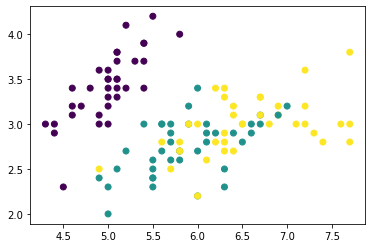

In [18]:
# График распределения тренеровочных значений
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c = y_train)
plt.show()

Выделяются 3 класса

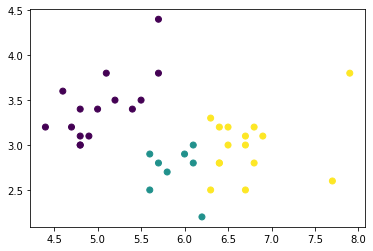

In [19]:
# График распределения предсказанных значений
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c= y_pred)
plt.show()

Text(0.5, 1.0, 'LDA model categories')

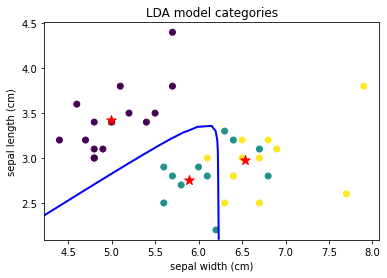

In [20]:
# График распределения предсказанных значений

plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c= y_test)
# Надодим центры наших классов через функцию means_
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=100, marker='*')

# делаем условную "сетку"
import numpy as np
nx, ny = 25, 25
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
# from matplotlib import colors
# plt.pcolormesh(xx, yy, Z, cmap='summer',norm=colors.Normalize(0., 1.), zorder=-1)

# Построение модели LDA
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='blue')
plt.ylabel('sepal length (cm)')
plt.xlabel('sepal width (cm)')
plt.title('LDA model categories')

#### Строим график локтя

In [21]:
from sklearn.cluster import KMeans

# Создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

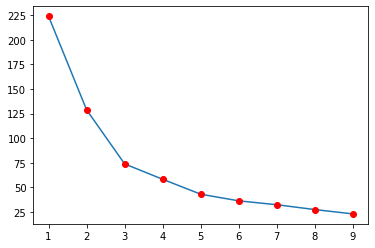

In [22]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

#### На графике выделяются 3 кластера

Text(0.5, 1.0, 'K-means')

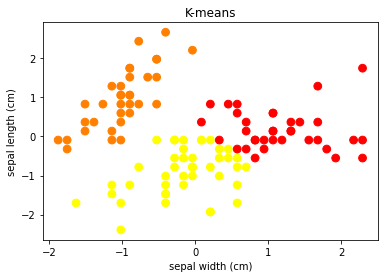

In [25]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X_train)

# указываем количество кластеров
kmeans = KMeans(n_clusters=3)

# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)
plt.ylabel('sepal length (cm)')
plt.xlabel('sepal width (cm)')
plt.title('K-means')